# Data Preprocessing

## Mục tiêu

Tiền xử lý dữ liệu (Data preprocessing) là một bước quan trọng trong quá trình xây dựng mô hình học máy. Mục tiêu chính là chuẩn bị và làm sạch dữ liệu nhằm đảm bảo đầu vào cho mô hình có chất lượng cao. 
Cụ thể, bước này bao gồm việc xử lý dữ liệu thiếu (nul), loại bỏ giá trị ngoại lai (outlier), chuẩn hóa dữ liệu (scaling) và chuyển đổi dữ liệu về định dạng phù hợp. Nhờ đó, mô hình có thể học hiệu quả hơn, giảm sai số và tránh hiện tượng quá khớp (overfitting).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
MODEL_DIR = os.getenv("MODEL_DIR", "E:/Project/Backpack Prediction Challenge")
os.makedirs(MODEL_DIR, exist_ok=True)

In [2]:
df = pd.read_csv(os.path.join(MODEL_DIR, "data/row\data.csv"))
df.drop('id', axis=1, inplace=True) # Loại bỏ cột id
df.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


## Xử lý Null

In [3]:
df_null_pre = df.copy()
df_null_pre.isnull().sum()

Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

In [4]:
categorical_cols = ['Brand', 'Size', 'Material', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
numeric_cols = ['Compartments','Weight Capacity (kg)', 'Price']

for col in categorical_cols:
    df_null_pre[col].fillna(df_null_pre[col].mode()[0], inplace=True)
for col in numeric_cols:
    df_null_pre[col].fillna(df_null_pre[col].mean(), inplace=True)

df_null_pre.isnull().sum()

Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64

Do các đặc trưng đều phi tuyến tính với nhau, không có mối liên hệ đáng chú ý nên ta sẽ điền mode cho các đặc trưng phân loại, điền trung vị cho các đặc trưng số học.

## Xử lý Outlier

In [5]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [6]:
df_outlier_pre = df_null_pre.copy()
for col in numeric_cols:
    df_outlier_pre = remove_outliers(df_null_pre, col)
    df_outlier_pre.reset_index(drop=True, inplace=True)
df_outlier_pre.shape

(300000, 10)

Các đặc trưng đều không có oulier, sau khi sàn lọc và bỏ các outlier bằng cách giới hạn trung vị thì số lượng các dòng vẫn còn nguyên

## Encoding

In [7]:
df_encoding_pre = df_outlier_pre.copy()

onehot_cols = ['Brand', 'Material', 'Style', 'Color']
ordinal_cols = ['Size', 'Laptop Compartment', 'Waterproof']

for col in onehot_cols: # One-hot Encoding
    dummies = pd.get_dummies(df_encoding_pre[col], prefix=col, drop_first=True).astype(int)
    df_encoding_pre = pd.concat([df_encoding_pre, dummies], axis=1)

for col in ordinal_cols: # Ordinal Encoding
    df_encoding_pre[col] = df_encoding_pre[col].astype('category').cat.codes

df_encoding_pre.drop(onehot_cols, axis=1, inplace=True)
df_encoding_pre

,Size,Compartments,Laptop Compartment,Waterproof,Weight Capacity (kg),Price,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Leather,Material_Nylon,Material_Polyester,Style_Messenger,Style_Tote,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,1,7.0,1,0,11.611723,112.15875,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,2,10.0,1,1,27.078537,68.88056,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2,2,2.0,1,0,16.643760,39.17320,0,0,0,1,1,0,0,1,0,0,0,0,0,1
3,2,8.0,1,0,12.937220,80.60793,0,1,0,0,0,1,0,1,0,0,0,1,0,0
4,1,1.0,1,1,17.749338,86.02312,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2,9.0,0,0,12.730812,129.99749,0,0,0,0,1,0,0,0,1,1,0,0,0,0
299996,0,6.0,0,1,26.633182,19.85819,1,0,0,0,1,0,0,0,1,1,0,0,0,0
299997,0,9.0,1,1,11.898250,111.41364,0,0,1,0,0,0,0,0,0,0,0,0,1,0
299998,2,1.0,0,1,6.175738,115.89080,0,0,0,0,0,1,0,0,1,0,0,0,1,0


# Feature Engineering

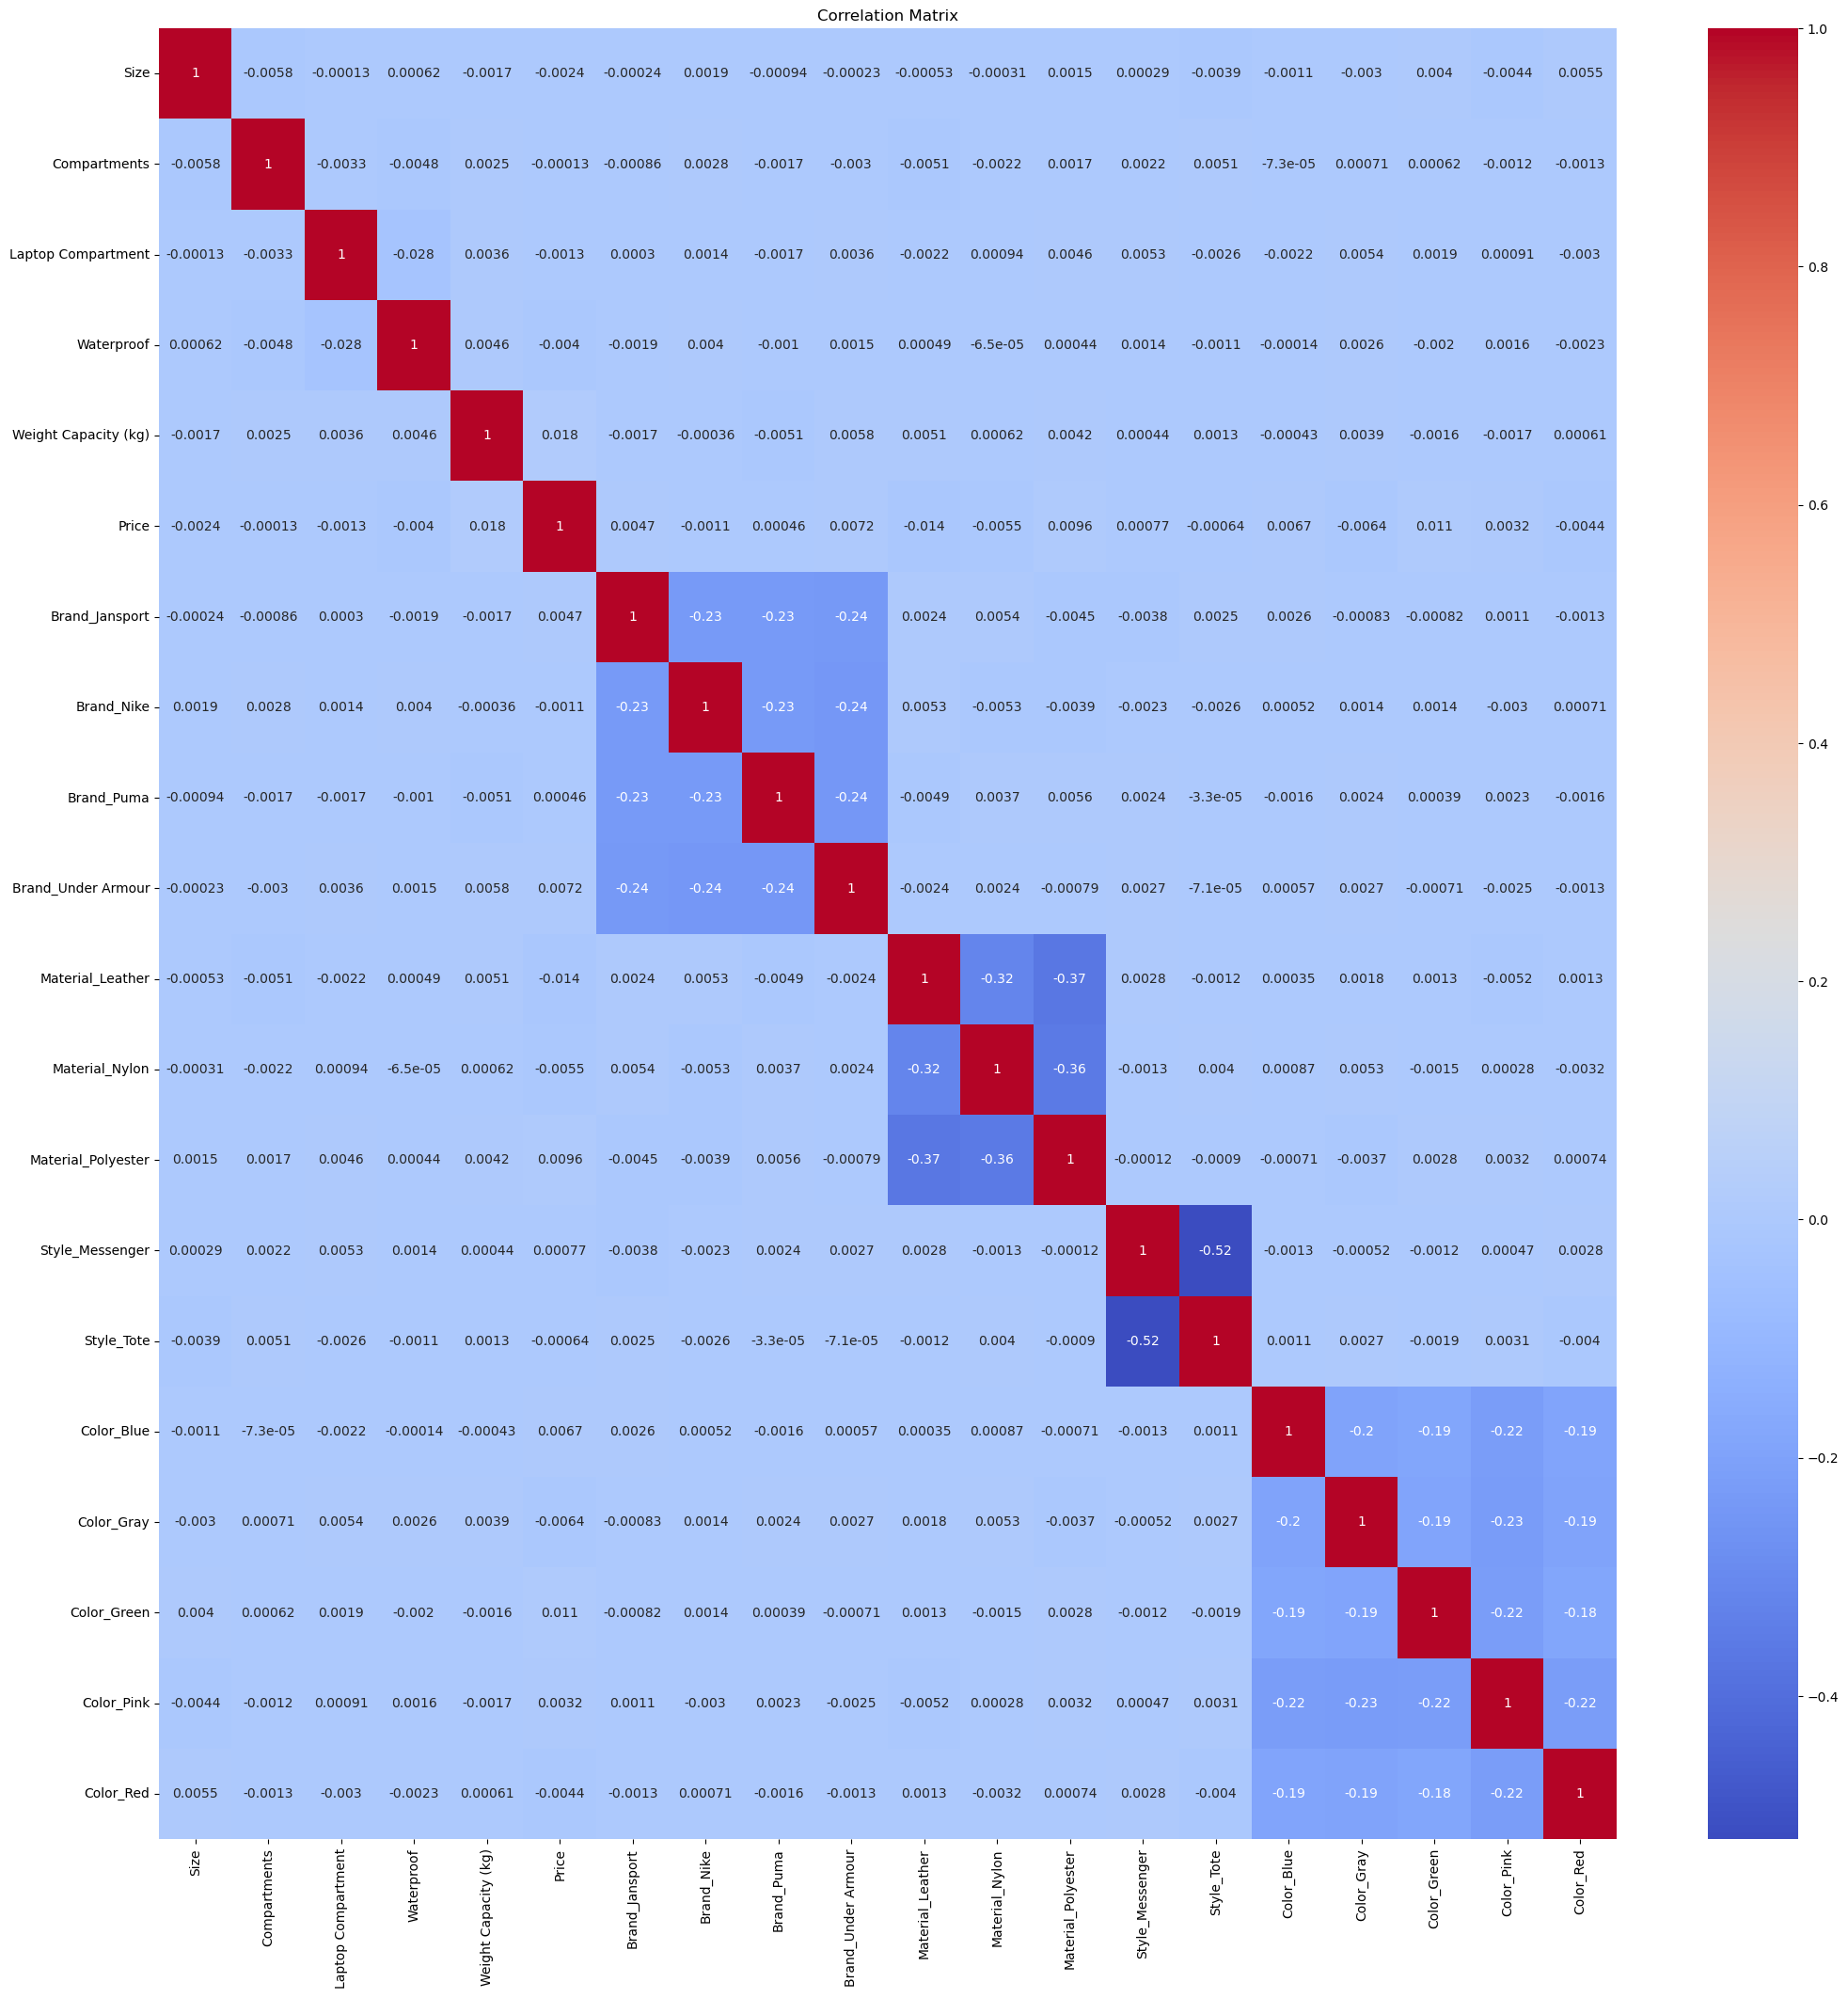

<Figure size 640x480 with 0 Axes>

In [8]:
df_feature_pre = df_encoding_pre.copy()

corr_matrix = df_feature_pre.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
plt.savefig(os.path.join(MODEL_DIR, "reports/eda/corr_last.png"), dpi=300, bbox_inches='tight')

Ta sẽ không áp dụng thêm các bước feature engineering phức tạp. Các biến ban đầu sau khi được tiền xử lý (bao gồm encoding và chuẩn hóa) đã cung cấp đủ thông tin để mô hình học. Ngoài ra, do đặc điểm của một số mô hình có khả năng tự động học các quan hệ phi tuyến và tương tác giữa các đặc trưng, nên việc thêm đặc trưng thủ công không mang lại cải thiện rõ rệt về hiệu suất.

Tuy nhiên, trong các bước tiếp theo sau khi thử nghiệm mô hình, có thể xem xét thêm các đặc trưng tương tác (feature interaction) và rút gọn đặc trưng (feature grouping) nhằm tối ưu hóa hơn nữa kết quả mô hình.

### Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
df_scaling_pre = df_feature_pre.copy()
cols = df_scaling_pre.columns.tolist()
cols.remove('Price')

df_scaling_pre[cols] = MinMaxScaler().fit_transform(df_scaling_pre[cols])
df_scaling_pre.head()

,Size,Compartments,Laptop Compartment,Waterproof,Weight Capacity (kg),Price,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Leather,Material_Nylon,Material_Polyester,Style_Messenger,Style_Tote,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,0.5,0.666667,1.0,0.0,0.264469,112.15875,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.000000,1.0,1.0,0.883141,68.88056,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.111111,1.0,0.0,0.465750,39.17320,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.777778,1.0,0.0,0.317489,80.60793,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.5,0.000000,1.0,1.0,0.509974,86.02312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [10]:
df_scaling_pre.to_csv((os.path.join(MODEL_DIR, "notebooks\data_preprocessed.csv")), index=False)